# aaaaaaaaa`

In [ ]:
import os
path = os.listdir('C:\\Users\\Lenovo\\jupyter_env\\antiSpoof')
print(path)

['anti-spoofing.csv', 'cut-out printouts', 'live_selfie', 'live_video', 'printouts', 'replay']


In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\lenovo\jupyter_env\env\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
from sklearn.model_selection import train_test_split

dataset_path = "C:\\Users\\Lenovo\\jupyter_env\\antiSpoof"

categories = ["cut-out printouts", "live_selfie", "live_video", "printouts", "replay"]

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\lenovo\jupyter_env\env\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\lenovo\jupyter_env\env\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def load_data(dataset_path, categories, img_size=(100, 100), frames_per_video=10):
    data = []
    labels = []

    for category in categories:
        folder_path = os.path.join(dataset_path, category)
        label = categories.index(category)

        for video_file in os.listdir(folder_path):
            video_path = os.path.join(folder_path, video_file)

            cap = cv2.VideoCapture(video_path)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            selected_frames = np.linspace(0, frame_count - 1, frames_per_video).astype(int)

            for frame_num in selected_frames:
                cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
                ret, frame = cap.read()

                if ret:
                    frame = cv2.resize(frame, img_size)
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    data.append(frame)
                    labels.append(label)

            cap.release()

    return np.array(data), np.array(labels)

In [ ]:
X, y = load_data(dataset_path, categories)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
X_train.shape
X_test.shape

(74, 100, 100, 3)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\users\lenovo\jupyter_env\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,421 (6.61 MB)

 Trainable params: 1,732,421 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=16)

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.3051 - loss: 1.5348 - val_accuracy: 0.4865 - val_loss: 1.1503
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.5333 - loss: 1.0722 - val_accuracy: 0.7568 - val_loss: 0.7234
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7289 - loss: 0.7065 - val_accuracy: 0.8243 - val_loss: 0.5399
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8391 - loss: 0.4107 - val_accuracy: 0.9595 - val_loss: 0.2476
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9590 - loss: 0.1760 - val_accuracy: 0.9595 - val_loss: 0.1637
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9734 - loss: 0.1228 - val_accuracy: 0.9189 - val_loss: 0.3100
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9306 - loss: 0.1715 - val_accuracy: 0.9595 - val_loss: 0.1129
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9881 - loss: 0.0791 - val_accuracy: 0.9459 - 

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred, target_names=categories))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
                   precision    recall  f1-score   support

cut-out printouts       1.00      1.00      1.00        18
      live_selfie       0.00      0.00      0.00         2
       live_video       1.00      1.00      1.00        18
        printouts       0.89      0.94      0.92        18
           replay       0.95      1.00      0.97        18

         accuracy                           0.96        74
        macro avg       0.77      0.79      0.78        74
     weighted avg       0.93      0.96      0.95        74



c:\users\lenovo\jupyter_env\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\lenovo\jupyter_env\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\lenovo\jupyter_env\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


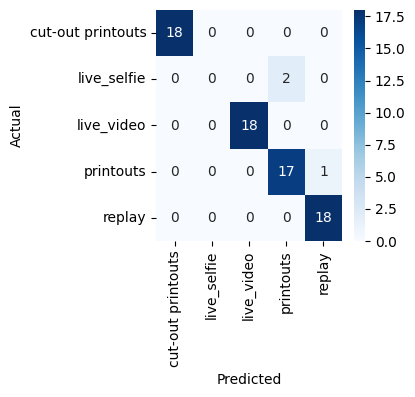

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import datetime
voter_data = {
    "123456": {"name": "Alice", "role": "voter", "image_Id": 2},
    "999999": {"name": "Admin", "role": "admin", "image_Id": 1}
}

vote_records = []
history = []
votes = {"Boat": 0, "Tree": 0, "Eagle": 0}

start_time = datetime.datetime(2025, 6, 18, 9, 0, 0)
end_time = datetime.datetime(2025, 6, 28, 23, 0, 0)

def predict_live():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()

    if not ret:
        return "No Frame Captured", None

    # ✅ Preprocess the frame
    face = cv2.resize(frame, (100, 100))
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = face / 255.0  # normalize to [0, 1]
    face = np.expand_dims(face, axis=0)  # shape = (1, 100, 100, 3)

    # ✅ Predict
    prediction = model.predict(face)
    predicted_class = np.argmax(prediction)  # returns index of highest prob

    label = categories[predicted_class]
    return label, frame,predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
replay 4


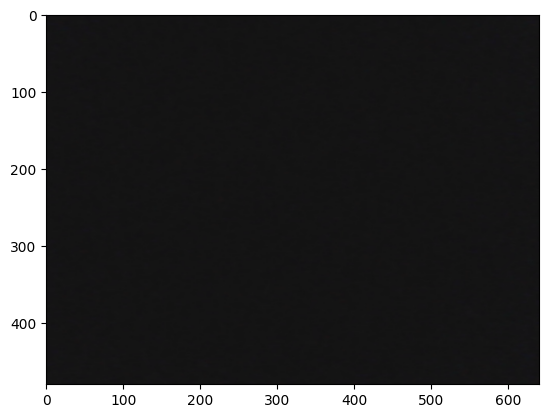

In [ ]:
r , c,index = predict_live()
print(r,index)
plt.imshow(c)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train = 'C:\\Users\\Lenovo\\jupyter_env\\FaceAuthentication\\train'
test = 'C:\\Users\\Lenovo\\jupyter_env\\FaceAuthentication\\test'

In [ ]:
train_datagen = ImageDataGenerator(
   rescale=1.0/255,              # normalize pixel values
    rotation_range=30,           # randomly rotate images
    width_shift_range=0.1,       # shift images horizontally
    height_shift_range=0.1,      # shift images vertically
    shear_range=0.1,             # shear transformation
    zoom_range=0.1,              # random zoom
    horizontal_flip=True,        # flip images horizontally
    fill_mode='nearest'

)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(100, 100),       # resize all images
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1998 images belonging to 5 classes.
Found 114 images belonging to 5 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
print(class_names)


['Sona_mia', 'erdowan', 'nanu', 'shoeb', 'xi']


In [ ]:
noOfClass=len(class_names)
print(noOfClass)
from tensorflow.keras import layers,models

5


In [ ]:
from tensorflow.keras import models, layers, regularizers

faceModel = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(noOfClass, activation='softmax')
])


c:\users\lenovo\jupyter_env\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
faceModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,333,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353,733 (16.61 MB)

 Trainable params: 4,353,733 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
faceModel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
faceModel.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples
)

c:\users\lenovo\jupyter_env\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 668ms/step - accuracy: 0.6713 - loss: 0.8721 - val_accuracy: 0.7895 - val_loss: 0.3940
Epoch 2/10


c:\users\lenovo\jupyter_env\env\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 340ms/step - accuracy: 0.9408 - loss: 0.1765 - val_accuracy: 0.7982 - val_loss: 0.7055
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - accuracy: 0.9724 - loss: 0.1047 - val_accuracy: 0.8772 - val_loss: 0.3456
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 342ms/step - accuracy: 0.9561 - loss: 0.1243 - val_accuracy: 0.8509 - val_loss: 0.3131
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 335ms/step - accuracy: 0.9643 - loss: 0.0925 - val_accuracy: 0.8684 - val_loss: 0.3279
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - accuracy: 0.9711 - loss: 0.0735 - val_accuracy: 0.8596 - val_loss: 0.3473
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 340ms/step - accuracy: 0.9783 - loss: 0.0667 - val_accuracy: 0.8684 - val_loss: 0.3457
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.9775 - loss: 0.0764 - val_accuracy: 0.8509 - val_loss: 0.3824
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 340ms/step - accuracy: 0.9799 - loss: 0.0657 - val_accuracy: 0.894

train_datagen = ImageDataGenerator(
rotation-range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode = 'nearest')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

true_labels = test_generator.classes
pred_probabilities = faceModel.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
pred_labels = np.argmax(pred_probabilities, axis=1)
class_names = list(test_generator.class_indices.keys())

print(classification_report(true_labels, pred_labels, target_names=class_names))



4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step
              precision    recall  f1-score   support

    Sona_mia       1.00      1.00      1.00        24
     erdowan       0.65      0.55      0.59        20
        nanu       1.00      1.00      1.00        23
       shoeb       1.00      1.00      1.00        21
          xi       0.69      0.77      0.73        26

    accuracy                           0.87       114
   macro avg       0.87      0.86      0.86       114
weighted avg       0.87      0.87      0.87       114



In [ ]:
def preprocess_image(img):
    # img might be original captured_frame (480,640,3)
    import cv2
    img = cv2.resize(img, (100, 100))  # resize to model expected size
    img = img.astype('float32') / 255.0  # normalize
    img = np.expand_dims(img, axis=0)  # add batch dimension
    return img



In [ ]:
import datetime
import cv2
import face_recognition
import os

def authenticate_user(nid):
    now = datetime.datetime.now()

    if now < start_time or now > end_time:
        return "Voting not allowed at this time."

    if nid not in voter_data:
        return "Please enter a valid NID."

    # Step 1: Spoof Detection
    label, captured_frame, index = predict_live()
    processed_frame = preprocess_image(captured_frame)
    if index < 0:
        print("index", index)
        return "❌ Spoof detected. Access denied."
    # Now run prediction
    target_img = faceModel.predict(processed_frame)
    label_ind = np.argmax(target_img,axis=1)
    print(class_names[label_ind[0]])
    print(class_names)
    print(label_ind[0])
    if voter_data["123456"]["image_Id"] == label_ind[0]:
        return 1
    else:
        return 0

In [ ]:
authenticate_user("123456")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
shoeb
['Sona_mia', 'erdowan', 'nanu', 'shoeb', 'xi']
3


0

In [ ]:
pip install cryptography

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: cryptography in c:\users\lenovo\jupyter_env\env\lib\site-packages (45.0.4)



You should consider upgrading via the 'c:\users\lenovo\jupyter_env\env\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
from cryptography.fernet import Fernet
key = Fernet.generate_key()
cipher = Fernet(key)

In [ ]:
def voting_dashboard(nid):
    print("\nChoose your candidate:")
    for candidate in votes:
        print(f"- {candidate}")
    choice = input("Enter your vote: ")

    if choice not in votes:
        print("Invalid vote.")
        return

    encrypted_vote = cipher.encrypt(choice.encode())
    vote_records.append(encrypted_vote)
    history.append((nid, choice, datetime.datetime.now()))
    del voter_data[nid]
    print("✅ Vote submitted successfully.")


In [ ]:
def show_results():
    print("\n🔐 Decrypted Voting Results:")
    for v in vote_records:
        original = cipher.decrypt(v).decode()
        votes[original] += 1
    for k, v in votes.items():
        print(f"{k}: {v} votes")


In [ ]:
def run_voting():
    nid = input("Enter your NID number: ")
    result = authenticate_user(nid)
    print("result",result)
    if result == 1:
        role = voter_data[nid]["role"]
        if role == "voter":
            voting_dashboard(nid)
        elif role == "admin":
            show_results()
    else:
        print(result)

run_voting()


Enter your NID number:  123456


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
shoeb
['Sona_mia', 'erdowan', 'nanu', 'shoeb', 'xi']
3
result 0
0


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
              precision    recall  f1-score   support

    Sona_mia       1.00      1.00      1.00        24
     erdowan       0.65      0.55      0.59        20
        nanu       1.00      1.00      1.00        23
       shoeb       1.00      1.00      1.00        21
          xi       0.69      0.77      0.73        26

    accuracy                           0.87       114
   macro avg       0.87      0.86      0.86       114
weighted avg       0.87      0.87      0.87       114



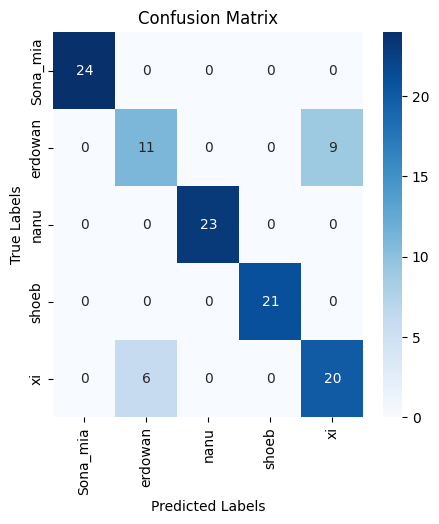

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# আপনার আগের কোড
true_labels = test_generator.classes
pred_probabilities = faceModel.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
pred_labels = np.argmax(pred_probabilities, axis=1)
class_names = list(test_generator.class_indices.keys())

# Classification Report
print(classification_report(true_labels, pred_labels, target_names=class_names))

# ✅ Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

# ✅ Visualization with Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
